In [1]:
import pandas as pd
import os 
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pickle
import re


## Generation results analysis

In [2]:
with open("../automatic_eval_results/all_autoeval_dfs.pkl", "rb") as f:
    all_generations = pickle.load(f)

In [128]:
all_generations[0]["Articolo di riferimento"].nunique(), all_generations[0]["Articolo di riferimento"].count()

(392, 1115)

In [3]:
for i in all_generations:
    print(i["Articolo di riferimento"].nunique(), i["Articolo di riferimento"].count(), 
          round(i["Articolo di riferimento"].count() / i["Articolo di riferimento"].nunique(), 2) )
    


392 1115 2.84
345 874 2.53
359 949 2.64
888 2116 2.38
623 2132 3.42
320 890 2.78


In [130]:
concat = pd.concat(all_generations)
print(f"Total input output and average generation rate:\n")
print(concat["Articolo di riferimento"].nunique(), concat["Articolo di riferimento"].count(), 
          round(concat["Articolo di riferimento"].count() / concat["Articolo di riferimento"].nunique(), 2) )

Total input output and average generation rate:

2927 8076 2.76


In [133]:
concat["IsQueryRelevant"].describe()

count     8076
unique      17
top         SI
freq      5379
Name: IsQueryRelevant, dtype: object

In [ ]:
for i in all_generations:
    
    print(f"Number of SI: {i[i["IsQueryRelevant"] == "SI"].shape[0]}    Number of NO: {i[i["IsQueryRelevant"] == "NO"].shape[0]}")

Number of SI: 736    Number of NO: 376
Number of SI: 606    Number of NO: 265
Number of SI: 621    Number of NO: 328
Number of SI: 1414    Number of NO: 698
Number of SI: 1464    Number of NO: 664
Number of SI: 538    Number of NO: 351


In [12]:
all_generations[0]["Articolo di riferimento"].unique().shape[0], all_generations[0]["Articolo di riferimento"].shape[0]

(392, 1115)

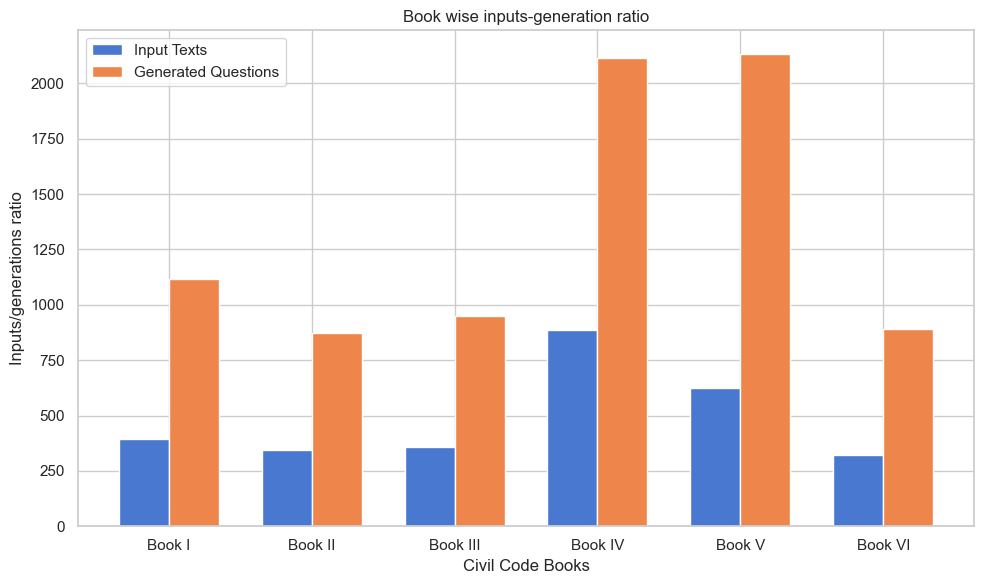

In [16]:
#input/generation ratio
data = []
for i in all_generations:
    values = (i["Articolo di riferimento"].unique().shape[0], i["Articolo di riferimento"].shape[0] )
    data.append(values)

# Apply Seaborn style
sns.set_theme(style="whitegrid")

# Extracting the values for Group A and Group B
group_a = [item[0] for item in data]
group_b = [item[1] for item in data]

# Categories
categories = ['Book I', 'Book II', 'Book III', 'Book IV', 'Book V', 'Book VI']

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, group_a, width, label='Input Texts', color=sns.color_palette("muted")[0])
bar2 = ax.bar(x + width/2, group_b, width, label='Generated Questions', color=sns.color_palette("muted")[1])


# Add labels, title, and legend
ax.set_xlabel('Civil Code Books')
ax.set_ylabel('Inputs/generations ratio')
ax.set_title('Book wise inputs-generation ratio')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


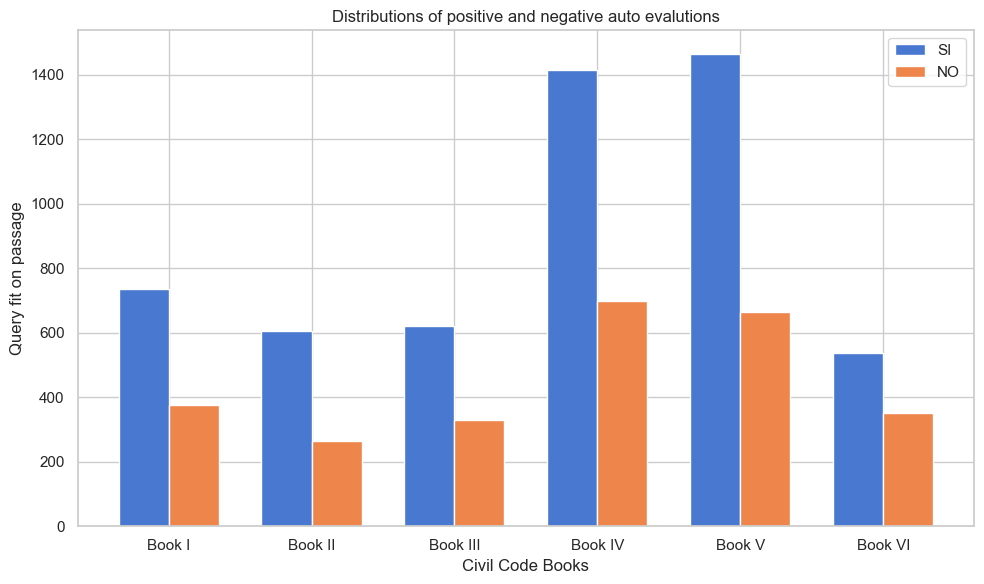

In [ ]:
data = []
for i in all_generations:
    values = (i[i["IsQueryRelevant"] == "SI"].shape[0], i[i["IsQueryRelevant"] == "NO"].shape[0] )
    data.append(values)

# Apply Seaborn style
sns.set_theme(style="whitegrid")

# Extracting the values for Group A and Group B
group_a = [item[0] for item in data]
group_b = [item[1] for item in data]

# Categories
categories = ['Book I', 'Book II', 'Book III', 'Book IV', 'Book V', 'Book VI']

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, group_a, width, label='SI', color=sns.color_palette("muted")[0])
bar2 = ax.bar(x + width/2, group_b, width, label='NO', color=sns.color_palette("muted")[1])


# Add labels, title, and legend
ax.set_xlabel('Civil Code Books')
ax.set_ylabel('Query fit on passage')
ax.set_title('Distributions of positive and negative auto evalutions')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [146]:
concat["IsQueryRelevant"].describe()

count     8076
unique      17
top         SI
freq      5379
Name: IsQueryRelevant, dtype: object

---

In [3]:
input_folder = "../manual_evaluation/input2eval"
os.listdir(input_folder)

['man_eval_randss_14.tsv',
 'man_eval_randss_28.tsv',
 'man_eval_randss_3.tsv',
 'man_eval_randss_31.tsv',
 'man_eval_randss_35.tsv']

In [2]:
man_eval_folder = "../manual_evaluation/evaluated_input"
os.listdir(man_eval_folder)

['Form_Responses_man_eval_randss_14.tsv',
 'Form_Responses_man_eval_randss_28.tsv',
 'Form_Responses_man_eval_randss_3.tsv',
 'Form_Responses_man_eval_randss_31.tsv',
 'Form_Responses_man_eval_randss_35.tsv']

In [5]:
pos = 0
for el in os.listdir(input_folder):
    df = pd.read_csv(os.path.join(input_folder, el), sep = "\t")
    pos += df[df["AutomaticEvaluation"] == "SI"].shape[0]

pos/ 500




0.674

## Brief overview

In [ ]:

total_accuracy = 0

for el in os.listdir(man_eval_folder):
    df = pd.read_csv(os.path.join(man_eval_folder, el), sep = "\t")
    res = [i[-1][0] for i in list(df.T.iterrows())[3:]]
    total_accuracy += len([i for i in res if i == "SI"])
    print(f"Results summary for {el}: {Counter(res)}\n\n")
print(f"Total accuracy for the sample: {total_accuracy/500}")

Results summary for Form_Responses_man_eval_randss_14.tsv: Counter({'SI': 86, 'NO': 14})


Results summary for Form_Responses_man_eval_randss_28.tsv: Counter({'SI': 78, 'NO': 22})


Results summary for Form_Responses_man_eval_randss_3.tsv: Counter({'SI': 83, 'NO': 17})


Results summary for Form_Responses_man_eval_randss_31.tsv: Counter({'SI': 94, 'NO': 6})


Results summary for Form_Responses_man_eval_randss_35.tsv: Counter({'SI': 76, 'NO': 23, nan: 1})


Total accuracy for the sample: 0.834


In [34]:
total_accuracy

417

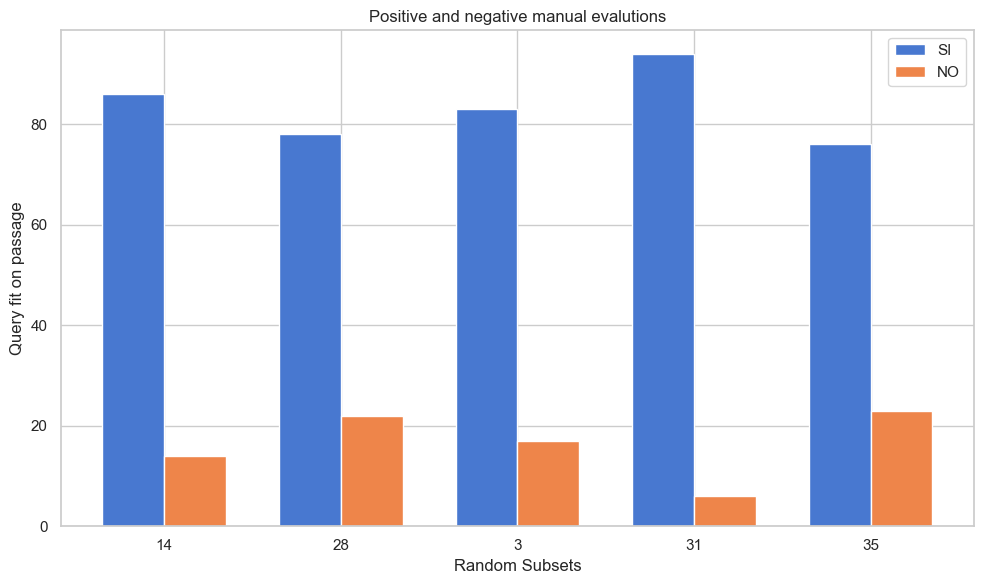

In [33]:
regex = re.compile(r"[^\d*]")
data = []
positives = []
negatives = []
categories = []
for el in os.listdir(man_eval_folder):
    df = pd.read_csv(os.path.join(man_eval_folder, el), sep = "\t")
    categories.append(re.sub(regex, "", el).strip())
    res = [i[-1][0] for i in list(df.T.iterrows())[3:]]
    positives = len([i for i in res if i == "SI"])
    negatives = len([i for i in res if i == "NO"])
    data.append((positives, negatives))

# Apply Seaborn style
sns.set_theme(style="whitegrid")

# Extracting the values for Group A and Group B
group_a = [item[0] for item in data]
group_b = [item[1] for item in data]

# # Categories
# categories = ['Book I', 'Book II', 'Book III', 'Book IV', 'Book V']

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, group_a, width, label='SI', color=sns.color_palette("muted")[0])
bar2 = ax.bar(x + width/2, group_b, width, label='NO', color=sns.color_palette("muted")[1])


# Add labels, title, and legend
ax.set_xlabel('Random Subsets')
ax.set_ylabel('Query fit on passage')
ax.set_title('Positive and negative manual evalutions')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
complete_dfs = []
total_positive_auto = 0
for el in os.listdir(man_eval_folder):
    df1 = pd.read_csv(os.path.join(man_eval_folder, el), sep = "\t")
    res = res = [i[-1][0] for i in list(df1.T.iterrows())[3:]]
    
    for el2 in os.listdir(input_folder):
        if el2 in el:
            df2 = pd.read_csv(os.path.join(input_folder, el2), sep = "\t")
            df2["HumanEval"] = res
            # new_df = df2
            # new_df["HumanEval"] = res
            total_positive_auto += df2[df2["AutomaticEvaluation"] == "SI"].shape[0]
            complete_dfs.append(df2)

    
            print(el, el2)
    

Form_Responses_man_eval_randss_14.tsv man_eval_randss_14.tsv
Form_Responses_man_eval_randss_28.tsv man_eval_randss_28.tsv
Form_Responses_man_eval_randss_3.tsv man_eval_randss_3.tsv
Form_Responses_man_eval_randss_31.tsv man_eval_randss_31.tsv
Form_Responses_man_eval_randss_35.tsv man_eval_randss_35.tsv


## Overall comparative analysis
- Confront Automatic and Human evaluations

In [35]:
# global metrics for all subset
big_df = pd.concat(complete_dfs).fillna("SI")

y_pred = big_df["AutomaticEvaluation"].tolist()
y_true = big_df["HumanEval"].tolist()

print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

          NO       0.33      0.66      0.44        82
          SI       0.92      0.74      0.82       418

    accuracy                           0.73       500
   macro avg       0.62      0.70      0.63       500
weighted avg       0.82      0.73      0.76       500



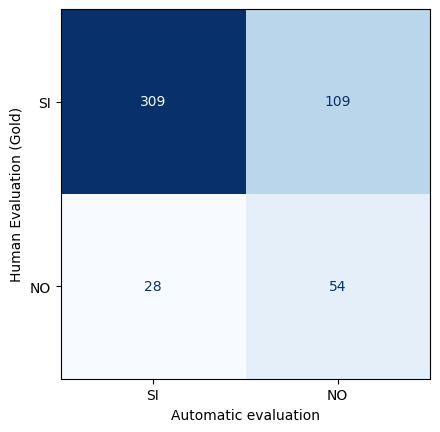

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred, labels= ["SI", "NO"])
cm_plot = ConfusionMatrixDisplay(cm, display_labels= ["SI", "NO"])

cm_plot.plot(cmap = "Blues", colorbar= False)
plt.ylabel("Human Evaluation (Gold)")
plt.xlabel("Automatic evaluation")
plt.show()

In [ ]:
#create mapping between model and human evaluations for the knee plot
regex = re.compile(r"[^\d*]")
dio = {}
total_accuracy = 0
for el in os.listdir(man_eval_folder):
    name = re.sub(regex, "", el).strip()
    df = pd.read_csv(os.path.join(man_eval_folder, el), sep = "\t")
    res = [i[-1][0] for i in list(df.T.iterrows())[3:]]
    dio[name] = len([i for i in res if i == "SI"])
    
    

In [193]:
dio = dict(sorted(dio.items(), key = lambda x: x[1]))
dio

{'35': 76, '28': 78, '3': 83, '14': 86, '31': 94}

In [ ]:
complete_dfs = []
total_positive_auto = 0

dio2 = {}
for el2 in os.listdir(input_folder):
        name = re.sub(regex, "", el2)
        df2 = pd.read_csv(os.path.join(input_folder, el2), sep = "\t")
        dio2[name] = df2[df2["AutomaticEvaluation"] == "SI"].shape[0]

    
           

In [208]:
dio3 = {}
for k in dio:
    dio3[k] = dio2[k]

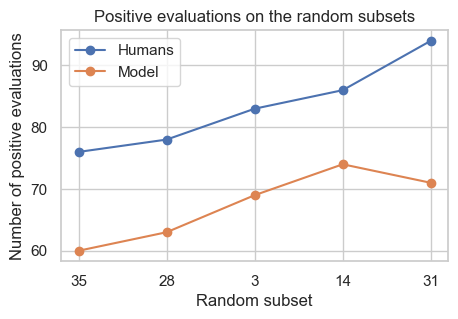

In [ ]:
import matplotlib.pyplot as plt

# Ensure the keys are ordered for plotting
keys1 = list(dio.keys())
keys2 = list(dio3.keys())

# Values corresponding to the sorted keys
values1 = [dio[key] for key in keys1]
values2 = [dio3[key] for key in keys2]

# Plot
plt.figure(figsize=(5, 3))
plt.plot(keys1, values1, marker='o', label='Humans')
plt.plot(keys2, values2, marker='o', label='Model')

# Labels and title
plt.xlabel('Random subset')
plt.ylabel('Number of positive evaluations')
plt.title('Positive evaluations on the random subsets')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
